In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [7]:
df = pd.read_csv('extended_amazon_sales_project.csv', encoding= 'unicode_escape')

In [11]:
df.shape

(105, 14)

In [13]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status
0,101,Alice,1001,Female,18-25,23,Single,California,West,Student,Electronics,2,300,Delivered
1,102,Bob,1002,Male,26-35,30,Married,Texas,South,Engineer,Books,1,20,Pending
2,103,Charlie,1003,Male,36-45,40,Married,Florida,South,Teacher,Clothing,3,150,Delivered
3,104,Diana,1004,Female,46-55,50,Single,New York,East,Doctor,Beauty,2,80,Cancelled
4,105,Eve,1005,Female,18-25,22,Single,Nevada,West,Student,Sports,1,60,Delivered


In [15]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status
0,101,Alice,1001,Female,18-25,23,Single,California,West,Student,Electronics,2,300,Delivered
1,102,Bob,1002,Male,26-35,30,Married,Texas,South,Engineer,Books,1,20,Pending
2,103,Charlie,1003,Male,36-45,40,Married,Florida,South,Teacher,Clothing,3,150,Delivered
3,104,Diana,1004,Female,46-55,50,Single,New York,East,Doctor,Beauty,2,80,Cancelled
4,105,Eve,1005,Female,18-25,22,Single,Nevada,West,Student,Sports,1,60,Delivered
5,106,Customer_106,1030,Female,46-55,19,Married,Arizona,West,Teacher,Toys,2,336,Cancelled
6,107,Customer_107,1056,Male,26-35,36,Single,Texas,West,Teacher,Clothing,3,247,Delivered
7,108,Customer_108,1035,Male,26-35,35,Single,Florida,South,Artist,Books,5,642,Cancelled
8,109,Customer_109,1050,Female,26-35,55,Single,Florida,South,Manager,Toys,3,942,Delivered
9,110,Customer_110,1043,Female,46-55,50,Married,Arizona,East,Self-employed,Clothing,5,969,Pending


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           105 non-null    int64 
 1   Cust_name         105 non-null    object
 2   Product_ID        105 non-null    int64 
 3   Gender            105 non-null    object
 4   Age Group         105 non-null    object
 5   Age               105 non-null    int64 
 6   Marital_Status    105 non-null    object
 7   State             105 non-null    object
 8   Zone              105 non-null    object
 9   Occupation        105 non-null    object
 10  Product_Category  105 non-null    object
 11  Orders            105 non-null    int64 
 12  Amount            105 non-null    int64 
 13  Status            105 non-null    object
dtypes: int64(5), object(9)
memory usage: 11.6+ KB


In [21]:
df.drop(['Status'], axis=1, inplace=True)

In [25]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [27]:
df.dropna(inplace=True)

In [29]:
df['Amount'] = df['Amount'].astype('int')

In [31]:
df['Amount'].dtypes

dtype('int32')

In [35]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [37]:
df.rename(columns={'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,101,Alice,1001,Female,18-25,23,Single,California,West,Student,Electronics,2,300
1,102,Bob,1002,Male,26-35,30,Married,Texas,South,Engineer,Books,1,20
2,103,Charlie,1003,Male,36-45,40,Married,Florida,South,Teacher,Clothing,3,150
3,104,Diana,1004,Female,46-55,50,Single,New York,East,Doctor,Beauty,2,80
4,105,Eve,1005,Female,18-25,22,Single,Nevada,West,Student,Sports,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,201,Customer_201,1038,Male,18-25,56,Single,Florida,West,Self-employed,Beauty,1,932
101,202,Customer_202,1043,Male,46-55,58,Single,Florida,South,Self-employed,Sports,3,823
102,203,Customer_203,1085,Male,26-35,59,Married,Arizona,West,Student,Electronics,5,254
103,204,Customer_204,1083,Female,55+,29,Married,New York,West,Artist,Electronics,2,326


In [41]:
df.describe()

,User_ID,Product_ID,Age,Orders,Amount
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,153.000000,1052.714286,40.390476,2.857143,519.133333
std,30.454885,30.052747,12.290940,1.410323,296.021831
min,101.000000,1001.000000,18.000000,1.000000,20.000000
25%,127.000000,1028.000000,30.000000,2.000000,277.000000
50%,153.000000,1050.000000,41.000000,3.000000,561.000000
75%,179.000000,1080.000000,50.000000,4.000000,792.000000
max,205.000000,1099.000000,60.000000,5.000000,1000.000000


In [43]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,105.000000,105.000000,105.000000
mean,40.390476,2.857143,519.133333
std,12.290940,1.410323,296.021831
min,18.000000,1.000000,20.000000
25%,30.000000,2.000000,277.000000
50%,41.000000,3.000000,561.000000
75%,50.000000,4.000000,792.000000
max,60.000000,5.000000,1000.000000


Exploratory Data Analysis

gender

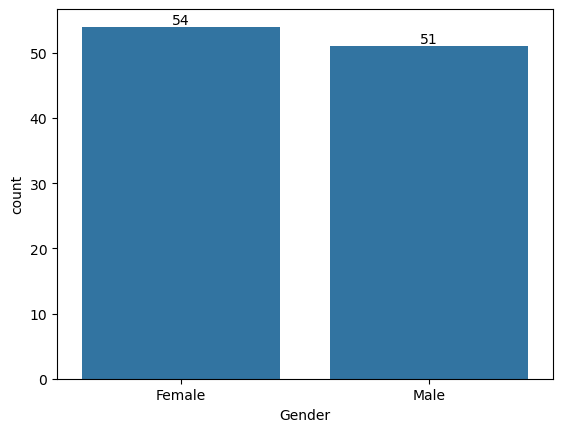

In [49]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

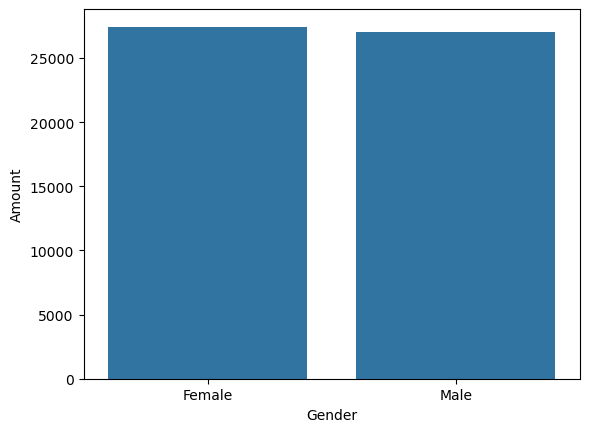

In [51]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

AGE

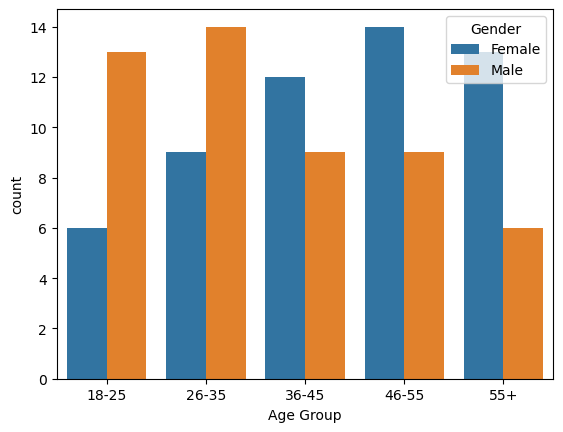

In [55]:
ax =sns.countplot(data =df , x ='Age Group' ,hue ='Gender')

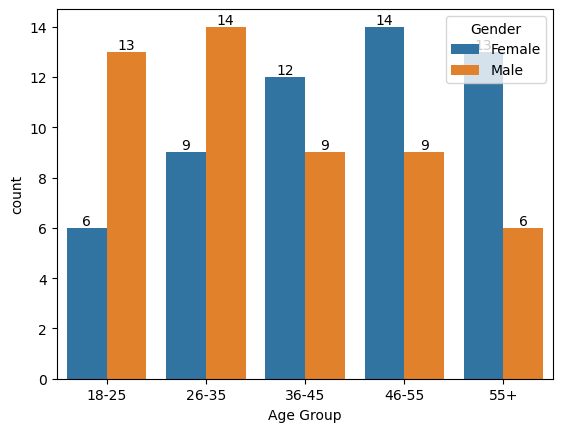

In [64]:
ax =sns.countplot(data =df , x ='Age Group' ,hue ='Gender')

for bars in ax.containers:
    ax.bar_label(bars)
    


<Axes: xlabel='Age Group', ylabel='Amount'>

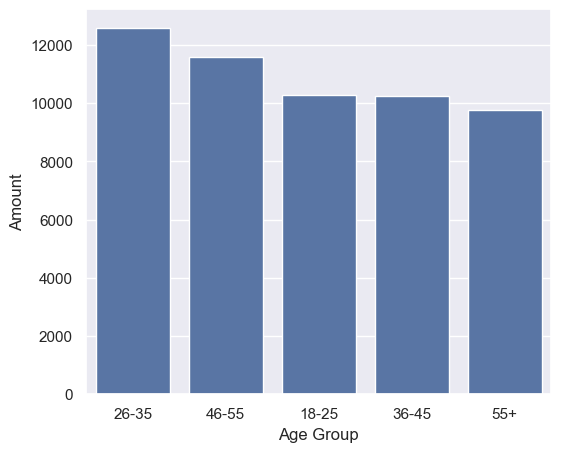

In [84]:
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x ='Age Group', y ='Amount' ,data = sales_age)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

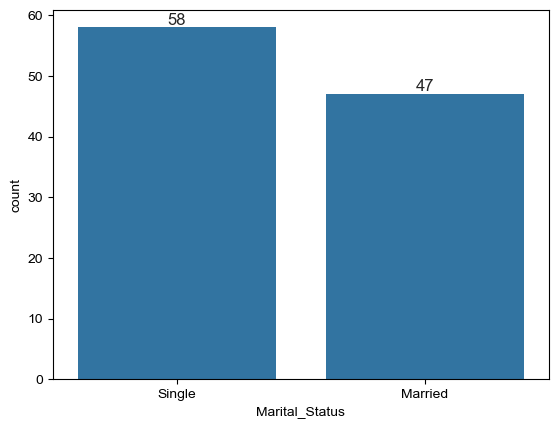

In [75]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

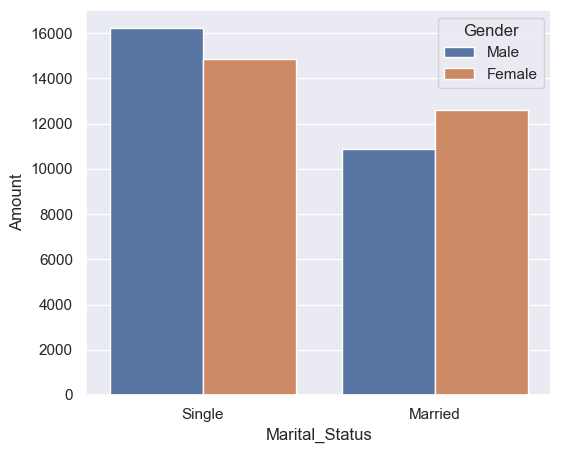

In [80]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

<Axes: xlabel='State', ylabel='Amount'>

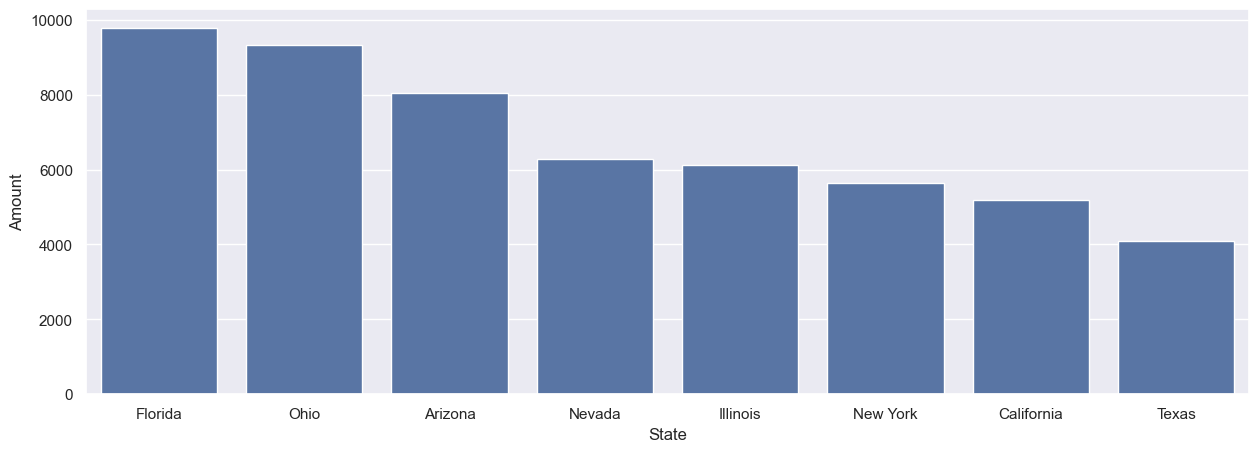

In [77]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

From above graphs we can see that most of the orders & total sales/amount are from Florida, Ohino and Arizona respectively

OCCUPATION

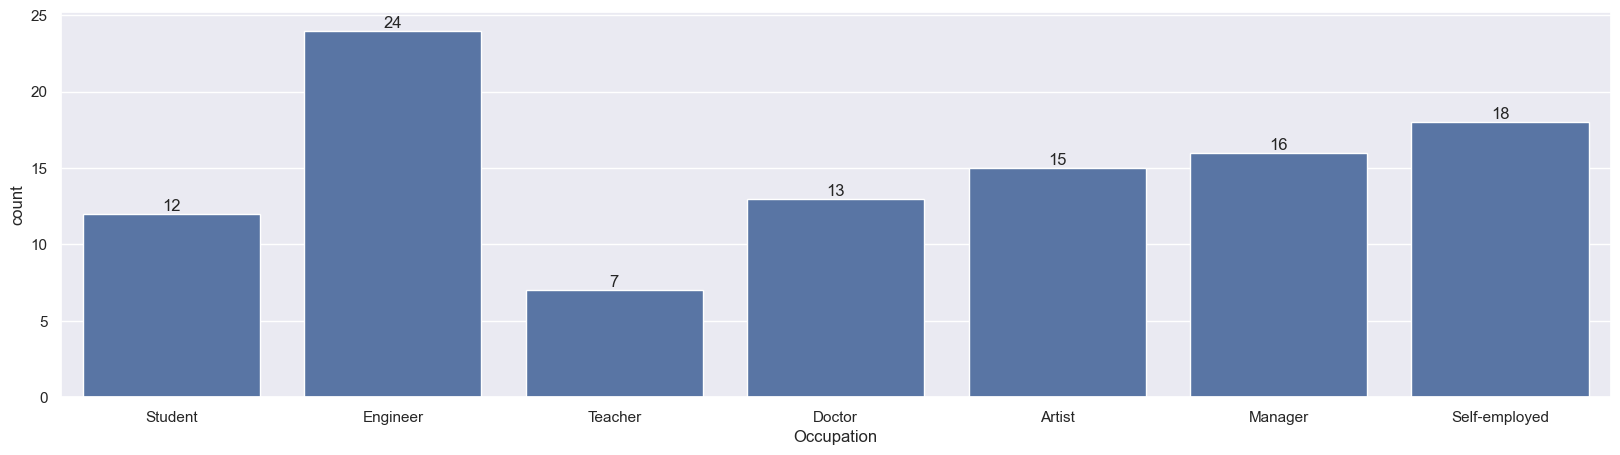

In [87]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

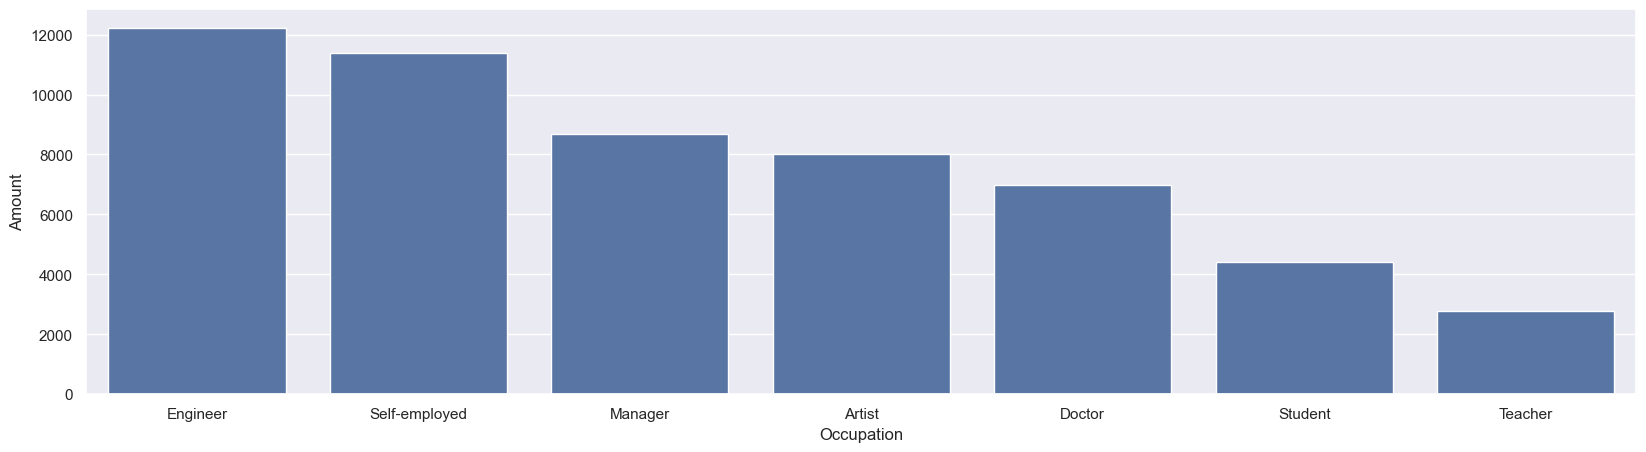

In [89]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

From above graphs we can see that most of the buyers are working as a Engineer, Self-employed and Manager

PRODUCT CATEGORY

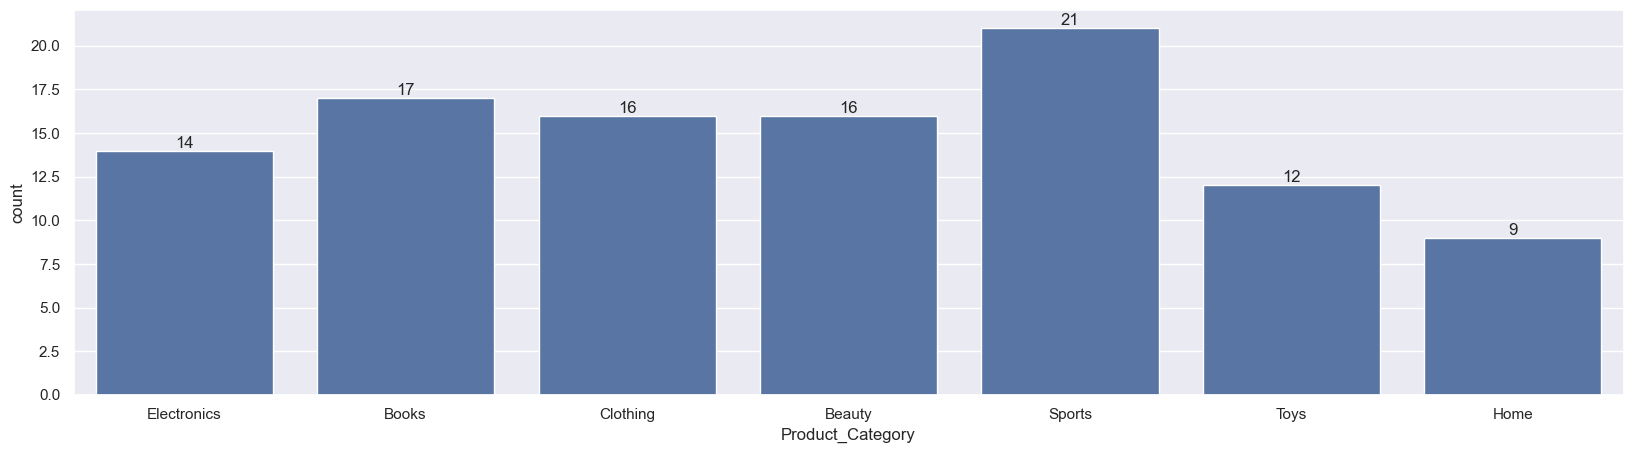

In [94]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

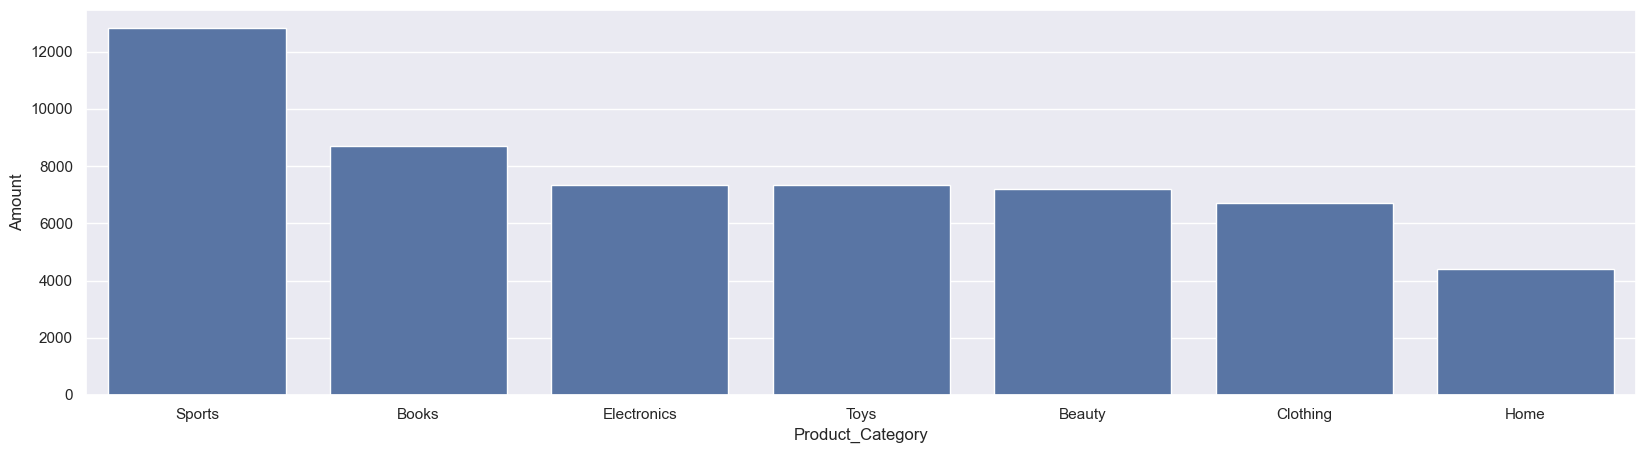

In [96]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

From above graphs we can see that most of the sold products are from Sports, Books and Electronics category

<Axes: xlabel='Product_ID'>

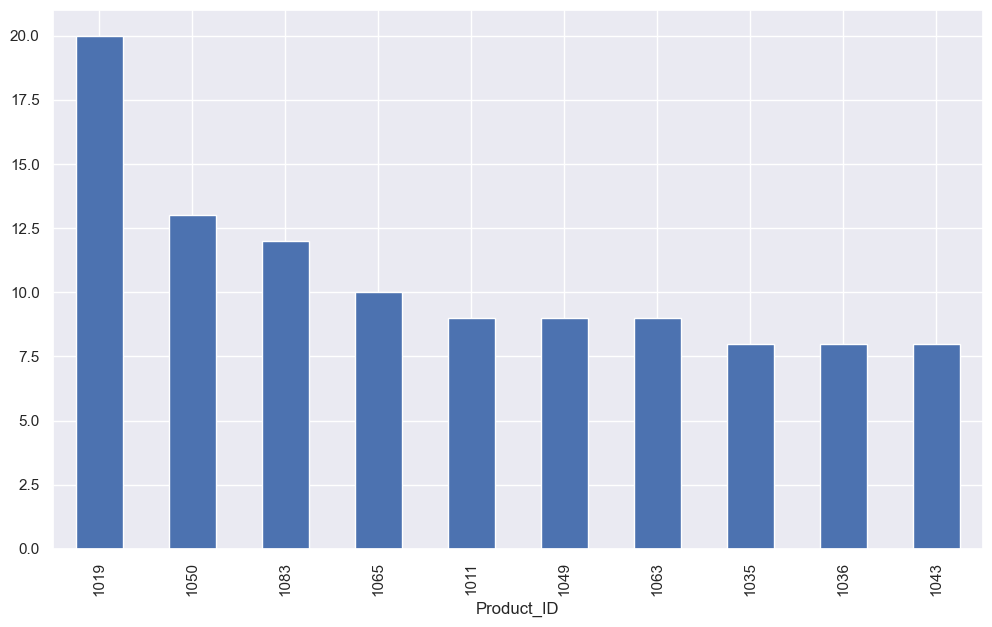

In [99]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

 CONCLUSION :-

Single Women age group of 26-35yr from florida and ohio and arizona working as Engineer or self- employed are More likely to buy products From Sports,
Books and Electonics Category


THANKYOU !
 